In [ ]:
## take the individual objects after doubletfinder

## in each individual object filter for the barcodes that are 
# in the cleaned object (no doublets, no low qc clusters, filtered nCount_ATAC > 500)

## where are the _1 and _2 coming from
## where does the _1 and _2 come from in the integrated histone object
## 

In [3]:
library(Seurat)
library(Signac)

In [32]:
poten_dup <- gsub("_.*", "", colnames(sobj))

In [33]:
length(poten_dup)

[1] 19260

In [35]:
length(unique(poten_dup))

[1] 19053

In [ ]:
colnames(sobj)

In [ ]:
# some barcodes have _1 and _2 and others don't have it

In [26]:
dir.create("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/sandbox/barcode_viewing/")

In [27]:
write.table(colnames(sobj), "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/sandbox/barcode_viewing/cln_obj_bc.txt")

In [106]:
sobj <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/06_paired_tag_integ_atac/240105_01_lung_pt_integ_atac_nodoub_filt_atac.RDS")

In [107]:
sobj

An object of class Seurat 
224815 features across 19260 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

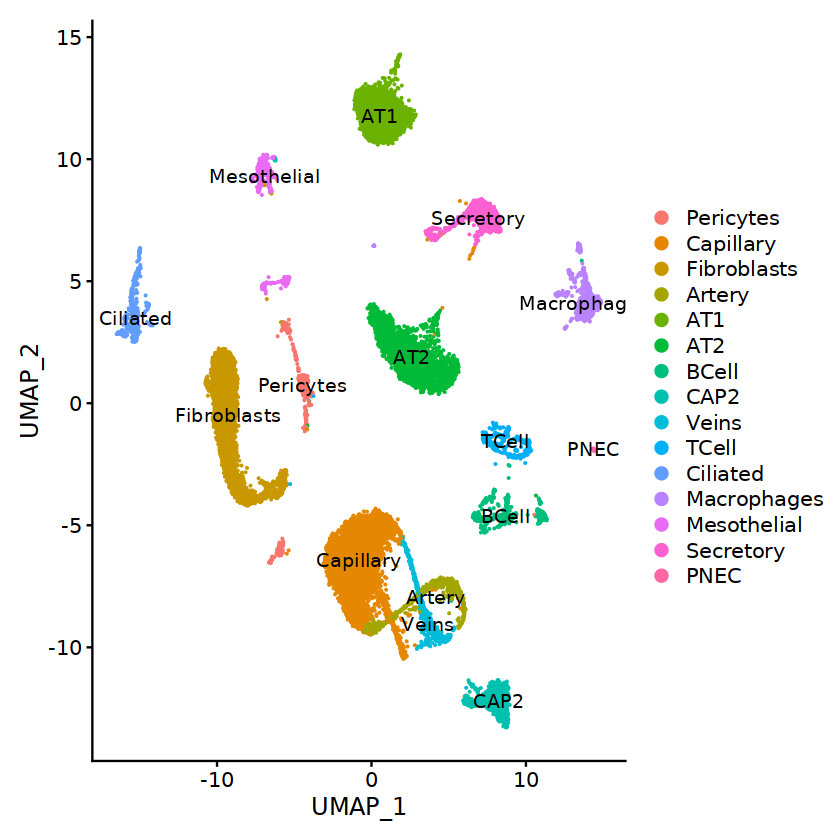

In [5]:
DimPlot(sobj, label = T)

In [7]:
sobj[['RNA']]
sobj[['H3K27ac']]
sobj[['H3K27me3']] #only one thats a chromatin assay still
sobj[['ATAC']]


Assay data with 32285 features for 19260 cells
First 10 features:
 Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15,
Lypla1 

Assay data with 71449 features for 19260 cells
First 10 features:
 chr1-3514511-3515425, chr1-3670705-3671174, chr1-3671301-3672079,
chr1-3913364-3914223, chr1-4408825-4409545, chr1-4412196-4413074,
chr1-4456478-4457389, chr1-4471192-4471869, chr1-4489814-4490155,
chr1-4490261-4490799 

ChromatinAssay data with 23296 features for 19260 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

Assay data with 75257 features for 19260 cells
First 10 features:
 chr1-3670536-3671156, chr1-3671301-3672191, chr1-3913332-3914171,
chr1-3915425-3916295, chr1-4255582-4256448, chr1-4259855-4260687,
chr1-4412190-4413102, chr1-4426673-4427603, chr1-4456410-4457357,
chr1-4470987-4472294 

In [18]:
sobj$cell_barcode <- colnames(sobj)

In [19]:
cln_barcodes <- colnames(sobj)

In [54]:
cln_barcodes_dups <-  gsub("_.*", "", colnames(sobj))

In [55]:
head(cln_barcodes_dups)

[1] "AAACAGCCAATAACGA-1" "AAACAGCCAGTTTACG-1" "AAACAGCCATAAAGCA-1"
[4] "AAACAGCCATCATGTG-1" "AAACATGCAATCCCTT-1" "AAACATGCAGTTAAAG-1"

In [ ]:
# /projects/ps-epigen/users/cmiciano/Lung/lungmap_3/02_DoubletFinder/df_objs/

In [6]:
sobj_atac <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/02_DoubletFinder/df_objs/JL_10_1_2_JL_09_1_2_DF.0.05.RDS")

In [8]:
sobj_atac

An object of class Seurat 
126070 features across 9603 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [11]:
colnames(sobj_atac@meta.data)

[1] "orig.ident"                       "nCount_RNA"                      
 [3] "nFeature_RNA"                     "nCount_ATAC"                     
 [5] "nFeature_ATAC"                    "fragments_freq_count"            
 [7] "FRiP"                             "percent.mt"                      
 [9] "nCount_SCT"                       "nFeature_SCT"                    
[11] "pANN_0.25_0.04_707"               "DF.classifications_0.25_0.04_707"

In [9]:
sobj_atac[['RNA']]
sobj_atac[['ATAC']]

Assay data with 32285 features for 9603 cells
First 10 features:
 Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15,
Lypla1 

ChromatinAssay data with 75257 features for 9603 cells
Variable features: 0 
Genome: 
Annotation present: FALSE 
Motifs present: FALSE 
Fragment files: 1 

In [20]:
sobj_atac$cell_barcode <- colnames(sobj_atac)

In [21]:
sobj_atac_cln <- subset(sobj_atac, cell_barcode %in% cln_barcodes )

In [22]:
sobj_atac_cln

An object of class Seurat 
126070 features across 5392 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [10]:
sobj_h3k27me3 <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/02_DoubletFinder/df_objs/QY_2221_1_2_QY_2220_DF.0.05.RDS")

In [12]:
sobj_h3k27me3

An object of class Seurat 
59045 features across 12480 samples within 3 assays 
Active assay: SCT (21935 features, 3000 variable features)
 2 other assays present: H3K27me3, RNA
 2 dimensional reductions calculated: pca, umap

In [14]:
sobj_h3k27me3
colnames(sobj_h3k27me3@meta.data)
sobj_h3k27me3[['RNA']]
sobj_h3k27me3[['H3K27me3']]

An object of class Seurat 
59045 features across 12480 samples within 3 assays 
Active assay: SCT (21935 features, 3000 variable features)
 2 other assays present: H3K27me3, RNA
 2 dimensional reductions calculated: pca, umap

[1] "orig.ident"                         "nCount_H3K27me3"                   
 [3] "nFeature_H3K27me3"                  "nCount_RNA"                        
 [5] "nFeature_RNA"                       "percent.mt"                        
 [7] "fragments_freq_count"               "FRiP"                              
 [9] "TSS.enrichment"                     "TSS.percentile"                    
[11] "library_rna_atac_id"                "nCount_SCT"                        
[13] "nFeature_SCT"                       "pANN_0.25_0.005_1184"              
[15] "DF.classifications_0.25_0.005_1184"

Assay data with 32285 features for 12480 cells
First 10 features:
 Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15,
Lypla1 

ChromatinAssay data with 4825 features for 12480 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

In [66]:
sobj_h3k27me3$cell_barcode <- colnames(sobj_h3k27me3)
sobj_h3k27me3_cln <- subset(sobj_h3k27me3, cell_barcode %in% cln_barcodes_dups)
sobj_h3k27me3_cln

An object of class Seurat 
59045 features across 7847 samples within 3 assays 
Active assay: SCT (21935 features, 3000 variable features)
 2 other assays present: H3K27me3, RNA
 2 dimensional reductions calculated: pca, umap

In [ ]:
# these objects already have had a slight filter applied
# originated from /01_paired_tag_filt_objs/

In [38]:
write.table(colnames(sobj_h3k27me3), "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/sandbox/barcode_viewing/h3k27me3_bc.txt")

In [16]:
sobj_h3k27ac <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/02_DoubletFinder/df_objs/QY_2223_1_2_QY_2222_DF.0.05.RDS")

In [17]:
sobj_h3k27ac
colnames(sobj_h3k27ac@meta.data)
sobj_h3k27ac[['RNA']]
sobj_h3k27ac[['H3K27ac']]

An object of class Seurat 
113186 features across 11907 samples within 3 assays 
Active assay: SCT (21916 features, 3000 variable features)
 2 other assays present: H3K27ac, RNA
 2 dimensional reductions calculated: pca, umap

[1] "orig.ident"                       "nCount_H3K27ac"                  
 [3] "nFeature_H3K27ac"                 "nCount_RNA"                      
 [5] "nFeature_RNA"                     "percent.mt"                      
 [7] "fragments_freq_count"             "FRiP"                            
 [9] "TSS.enrichment"                   "TSS.percentile"                  
[11] "library_rna_atac_id"              "nCount_SCT"                      
[13] "nFeature_SCT"                     "pANN_0.25_0.3_1078"              
[15] "DF.classifications_0.25_0.3_1078"

Assay data with 32285 features for 11907 cells
First 10 features:
 Xkr4, Gm1992, Gm19938, Gm37381, Rp1, Sox17, Gm37587, Gm37323, Mrpl15,
Lypla1 

ChromatinAssay data with 58985 features for 11907 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

In [56]:
sobj_h3k27ac$cell_barcode <- colnames(sobj_h3k27ac)
sobj_h3k27ac_cln <- subset(sobj_h3k27ac, cell_barcode %in% cln_barcodes_dups )
sobj_h3k27ac_cln

An object of class Seurat 
113186 features across 6185 samples within 3 assays 
Active assay: SCT (21916 features, 3000 variable features)
 2 other assays present: H3K27ac, RNA
 2 dimensional reductions calculated: pca, umap

In [57]:
sobj_h3k27ac_cln

An object of class Seurat 
113186 features across 6185 samples within 3 assays 
Active assay: SCT (21916 features, 3000 variable features)
 2 other assays present: H3K27ac, RNA
 2 dimensional reductions calculated: pca, umap

In [64]:
colnames(sobj_h3k27ac_cln@meta.data)

[1] "orig.ident"                       "nCount_H3K27ac"                  
 [3] "nFeature_H3K27ac"                 "nCount_RNA"                      
 [5] "nFeature_RNA"                     "percent.mt"                      
 [7] "fragments_freq_count"             "FRiP"                            
 [9] "TSS.enrichment"                   "TSS.percentile"                  
[11] "library_rna_atac_id"              "nCount_SCT"                      
[13] "nFeature_SCT"                     "pANN_0.25_0.3_1078"              
[15] "DF.classifications_0.25_0.3_1078" "cell_barcode"

In [ ]:
celltype_df <- data.frame(celltype=anno_obj$celltype)
head(celltype_df)

In [ ]:
celltype_df$orig_bc <- gsub('QY_2221_1_2_QY_2220_|QY_2223_1_2_QY_2222_', '',rownames(celltype_df) )

In [ ]:
duplicated_rows <- celltype_df[duplicated(celltype_df$orig_bc) | duplicated(celltype_df$orig_bc, fromLast = TRUE), ]
head(duplicated_rows )

In [ ]:
sorted_duplicated_rows <- duplicated_rows[order(duplicated_rows$orig_bc), ]
head(sorted_duplicated_rows)  #only 200 cells so i think its okay

In [ ]:
# Find duplicated rows based on the 'barcode' column.
duplicates <- duplicated(celltype_df$orig_bc)

# Remove duplicated rows.
celltype_df_nodup <- celltype_df[!duplicates, ]

In [ ]:
# filtering for barcodes / celltype labels in me3
ct_filt_H3K27me3 <- subset(celltype_df_nodup, celltype_df_nodup$orig_bc %in% colnames(filt_H3K27me3))

In [ ]:
trunc_bc_me3 <- data.frame("celltype"=ct_filt_H3K27me3$celltype)
rownames(trunc_bc_me3) <- ct_filt_H3K27me3$orig_bc

In [69]:
DefaultAssay(sobj_h3k27ac_cln) <- 'H3K27ac'
CoveragePlot(sobj_h3k27ac_cln, region = "Nkx2-1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v02") 

ERROR: Error: Cannot find 'celltype_v02' in this Seurat object


In [39]:
write.table(colnames(sobj_h3k27ac), "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/sandbox/barcode_viewing/h3k27ac_bc.txt")

In [ ]:
# JL_10_1_2_JL_09_1_2_DF.0.05.RDS
# QY_2221_1_2_QY_2220_DF.0.05.RDS
# QY_2223_1_2_QY_2222_DF.0.05.RDS

In [40]:
sobj_hist <- readRDS("/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/05_paired_tag_integ/231220_lung_pt_integ_reanno_filt.RDS")

In [41]:
sobj_hist

An object of class Seurat 
124150 features across 14956 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

In [45]:
sobj_hist[["H3K27me3"]]

ChromatinAssay data with 23296 features for 14956 cells
Variable features: 0 
Genome: 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

In [46]:
sobj_hist[["H3K27ac"]]

Assay data with 71449 features for 14956 cells
First 10 features:
 chr1-3514511-3515425, chr1-3670705-3671174, chr1-3671301-3672079,
chr1-3913364-3914223, chr1-4408825-4409545, chr1-4412196-4413074,
chr1-4456478-4457389, chr1-4471192-4471869, chr1-4489814-4490155,
chr1-4490261-4490799 

In [ ]:
# in hist + atac, its hist first, then atac second

In [51]:
Seurat:::CheckDuplicateCellNames #based on whatever is first in the list (in the histone obj its me3 first ac second)

function (object.list, verbose = TRUE, stop = FALSE) 
{
    cell.names <- unlist(x = lapply(X = object.list, FUN = colnames))
    if (any(duplicated(x = cell.names))) {
        if (stop) {
            stop("Duplicate cell names present across objects provided.")
        }
        if (verbose) {
            warning("Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.")
        }
        object.list <- lapply(X = 1:length(x = object.list), 
            FUN = function(x) {
                return(RenameCells(object = object.list[[x]], 
                  new.names = paste0(Cells(x = object.list[[x]]), 
                    "_", x)))
            })
    }
    return(object.list)
}
<bytecode: 0x55ae51c39480>
<environment: namespace:Seurat>

In [ ]:
sobj_hist

In [ ]:
# hm maybe can use the orig.ident to trace back where the cell came from

In [67]:
sobj

An object of class Seurat 
224815 features across 19260 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [68]:
table(sobj$orig.ident)


    JL_10_1_2_JL_09_1_2 QY_2221_1_2_QY_2220_1_2 QY_2223_1_2_QY_2222_1_2 
                   5392                    7781                    6087 

In [105]:
table(sobj$library_rna_atac_id)


QY_2221_1_2_QY_2220_1_2 QY_2223_1_2_QY_2222_1_2 
                   7781                    6087 

In [42]:
write.table(colnames(sobj_hist), "/projects/ps-epigen/users/cmiciano/Lung/lungmap_3/sandbox/barcode_viewing/cln_integ_hist_bc.txt")

In [ ]:
sobj_hist$cell_barcode <- colnames(sobj_hist)
sobj_hist_cln <- subset(sobj_hist, cell_barcode %in% cln_barcodes )
sobj_hist_cln

In [43]:
sobj_hist

An object of class Seurat 
124150 features across 14956 samples within 4 assays 
Active assay: integrated (2000 features, 2000 variable features)
 3 other assays present: RNA, H3K27me3, H3K27ac
 2 dimensional reductions calculated: pca, integrated.umap

In [ ]:
## seems like after integration some barcodes have the underscore attached if they're a duplicate
### seems like _1 is for methyl and _2 is for acetyl?

In [ ]:
## maybe what i can do is subset for the cells (removing the underscore)
## subset for the cleaned cells in the histone object
## transfer over the cell barcodes, celltype annotation, and orig.ident (library id)

## 

In [70]:
sobj

An object of class Seurat 
224815 features across 19260 samples within 7 assays 
Active assay: H3K27me3 (23296 features, 0 variable features)
 6 other assays present: RNA, H3K27ac, integrated, ATAC, SCT, integrated_atac
 2 dimensional reductions calculated: pca, integrated.atac.umap

In [71]:
colnames(sobj@meta.data)

[1] "orig.ident"                               
 [2] "nCount_RNA"                               
 [3] "nFeature_RNA"                             
 [4] "percent.mt"                               
 [5] "nCount_H3K27me3"                          
 [6] "nFeature_H3K27me3"                        
 [7] "library_rna_atac_id"                      
 [8] "RNA_snn_res.0.5"                          
 [9] "seurat_clusters"                          
[10] "nCount_H3K27ac"                           
[11] "nFeature_H3K27ac"                         
[12] "integrated_snn_res.0.5"                   
[13] "predicted.id"                             
[14] "prediction.score.unclassified"            
[15] "prediction.score.vascular.smooth.muscle"  
[16] "prediction.score.alveolar.developmental"  
[17] "prediction.score.ciliated"                
[18] "prediction.score.myofibroblast"           
[19] "prediction.score.fibroblast"              
[20] "prediction.score.endothelium"             
[21] "prediction.score.alveolar.type.1"         
[22] "prediction.score.alveolar.type.2"         
[23] "prediction.score.macrophage"              
[24] "prediction.score.pulmonary.neuroendocrine"
[25] "prediction.score.airway.smooth.muscle"    
[26] "prediction.score.NK.T.cell"               
[27] "prediction.score.B.cell"                  
[28] "prediction.score.max"                     
[29] "DF.classifications"                       
[30] "celltype"                                 
[31] "celltype_v02"                             
[32] "nCount_ATAC"                              
[33] "nFeature_ATAC"                            
[34] "fragments_freq_count"                     
[35] "FRiP"                                     
[36] "nCount_SCT"                               
[37] "nFeature_SCT"                             
[38] "DF.classifications_RNA"                   
[39] "pANN_RNA"                                 
[40] "integrated_atac_snn_res.0.5"              
[41] "celltype_v03"                             
[42] "nCount_integrated"                        
[43] "nFeature_integrated"                      
[44] "celltype_v04"                             
[45] "cell_barcode"

In [72]:
celltype_df <- data.frame(celltype=sobj$celltype_v04)
head(celltype_df)

,celltype
,<chr>
AAACAGCCAATAACGA-1_1,Pericytes
AAACAGCCAGTTTACG-1_1,Capillary
AAACAGCCATAAAGCA-1_1,Pericytes
AAACAGCCATCATGTG-1_1,Fibroblasts
AAACATGCAATCCCTT-1_1,Capillary
AAACATGCAGTTAAAG-1_1,Capillary


In [73]:
celltype_df$orig_bc <- gsub('_.*', '',rownames(celltype_df) )

In [74]:
head(celltype_df)

,celltype,orig_bc
,<chr>,<chr>
AAACAGCCAATAACGA-1_1,Pericytes,AAACAGCCAATAACGA-1
AAACAGCCAGTTTACG-1_1,Capillary,AAACAGCCAGTTTACG-1
AAACAGCCATAAAGCA-1_1,Pericytes,AAACAGCCATAAAGCA-1
AAACAGCCATCATGTG-1_1,Fibroblasts,AAACAGCCATCATGTG-1
AAACATGCAATCCCTT-1_1,Capillary,AAACATGCAATCCCTT-1
AAACATGCAGTTAAAG-1_1,Capillary,AAACATGCAGTTAAAG-1


In [75]:
celltype_df$orig.ident <- sobj$orig.ident

In [77]:
table(celltype_df$orig.ident)


    JL_10_1_2_JL_09_1_2 QY_2221_1_2_QY_2220_1_2 QY_2223_1_2_QY_2222_1_2 
                   5392                    7781                    6087 

In [78]:
head(celltype_df)

,celltype,orig_bc,orig.ident
,<chr>,<chr>,<chr>
AAACAGCCAATAACGA-1_1,Pericytes,AAACAGCCAATAACGA-1,QY_2221_1_2_QY_2220_1_2
AAACAGCCAGTTTACG-1_1,Capillary,AAACAGCCAGTTTACG-1,QY_2221_1_2_QY_2220_1_2
AAACAGCCATAAAGCA-1_1,Pericytes,AAACAGCCATAAAGCA-1,QY_2221_1_2_QY_2220_1_2
AAACAGCCATCATGTG-1_1,Fibroblasts,AAACAGCCATCATGTG-1,QY_2221_1_2_QY_2220_1_2
AAACATGCAATCCCTT-1_1,Capillary,AAACATGCAATCCCTT-1,QY_2221_1_2_QY_2220_1_2
AAACATGCAGTTAAAG-1_1,Capillary,AAACATGCAGTTAAAG-1,QY_2221_1_2_QY_2220_1_2


In [79]:
colnames(sobj@meta.data)

[1] "orig.ident"                               
 [2] "nCount_RNA"                               
 [3] "nFeature_RNA"                             
 [4] "percent.mt"                               
 [5] "nCount_H3K27me3"                          
 [6] "nFeature_H3K27me3"                        
 [7] "library_rna_atac_id"                      
 [8] "RNA_snn_res.0.5"                          
 [9] "seurat_clusters"                          
[10] "nCount_H3K27ac"                           
[11] "nFeature_H3K27ac"                         
[12] "integrated_snn_res.0.5"                   
[13] "predicted.id"                             
[14] "prediction.score.unclassified"            
[15] "prediction.score.vascular.smooth.muscle"  
[16] "prediction.score.alveolar.developmental"  
[17] "prediction.score.ciliated"                
[18] "prediction.score.myofibroblast"           
[19] "prediction.score.fibroblast"              
[20] "prediction.score.endothelium"             
[21] "prediction.score.alveolar.type.1"         
[22] "prediction.score.alveolar.type.2"         
[23] "prediction.score.macrophage"              
[24] "prediction.score.pulmonary.neuroendocrine"
[25] "prediction.score.airway.smooth.muscle"    
[26] "prediction.score.NK.T.cell"               
[27] "prediction.score.B.cell"                  
[28] "prediction.score.max"                     
[29] "DF.classifications"                       
[30] "celltype"                                 
[31] "celltype_v02"                             
[32] "nCount_ATAC"                              
[33] "nFeature_ATAC"                            
[34] "fragments_freq_count"                     
[35] "FRiP"                                     
[36] "nCount_SCT"                               
[37] "nFeature_SCT"                             
[38] "DF.classifications_RNA"                   
[39] "pANN_RNA"                                 
[40] "integrated_atac_snn_res.0.5"              
[41] "celltype_v03"                             
[42] "nCount_integrated"                        
[43] "nFeature_integrated"                      
[44] "celltype_v04"                             
[45] "cell_barcode"

In [ ]:
## subset the atac for the cells in the filtered object

In [80]:
df_filt_atac <- subset(celltype_df, orig.ident == "JL_10_1_2_JL_09_1_2")

In [81]:
nrow(df_filt_atac)

[1] 5392

In [84]:
sobj_atac

An object of class Seurat 
126070 features across 9603 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [85]:
sobj_atac_cln <- subset(sobj_atac, cell_barcode %in% df_filt_atac$orig_bc)

In [86]:
sobj_atac_cln 

An object of class Seurat 
126070 features across 5392 samples within 3 assays 
Active assay: SCT (18528 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 2 dimensional reductions calculated: pca, umap

In [93]:
Annotation(sobj_atac_cln)

NULL

In [87]:
sobj_atac_cln$celltype_v04 <- df_filt_atac$celltype

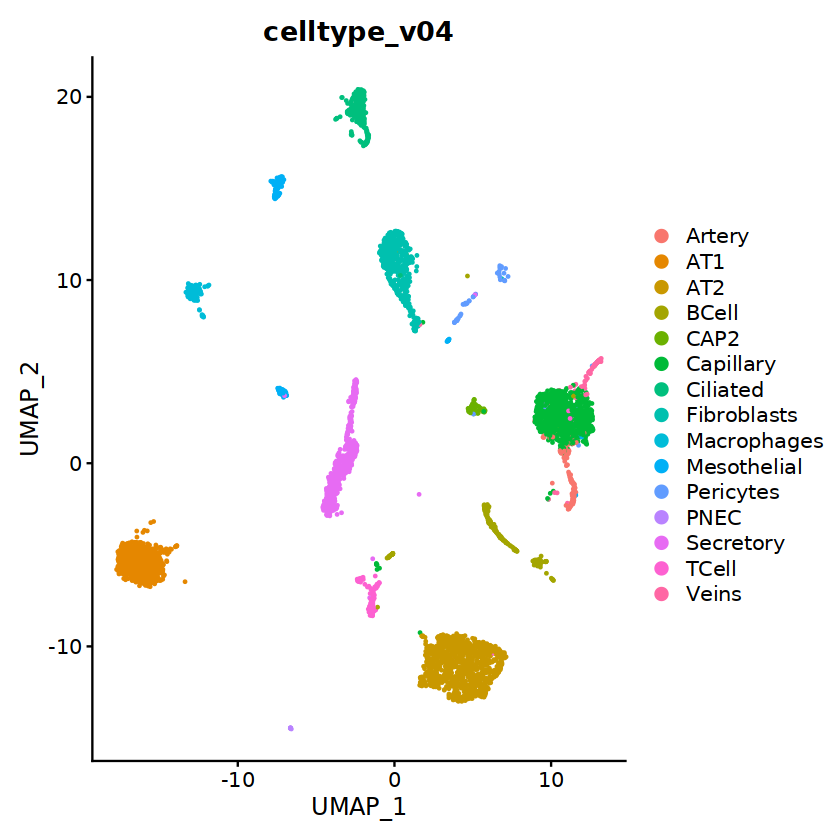

In [89]:
DimPlot(sobj_atac_cln, group.by = "celltype_v04")

In [94]:
head(sobj_atac_cln@assays$ATAC)

,count,percentile
,<dbl>,<dbl>
chr1-3670536-3671156,125,0.42879732
chr1-3671301-3672191,354,0.79152770
chr1-3913332-3914171,46,0.04252096
chr1-3915425-3916295,55,0.07215276
chr1-4255582-4256448,31,0.01601180
chr1-4259855-4260687,49,0.05071953
chr1-4412190-4413102,239,0.69872570
chr1-4426673-4427603,78,0.19796165
chr1-4456410-4457357,85,0.23829013


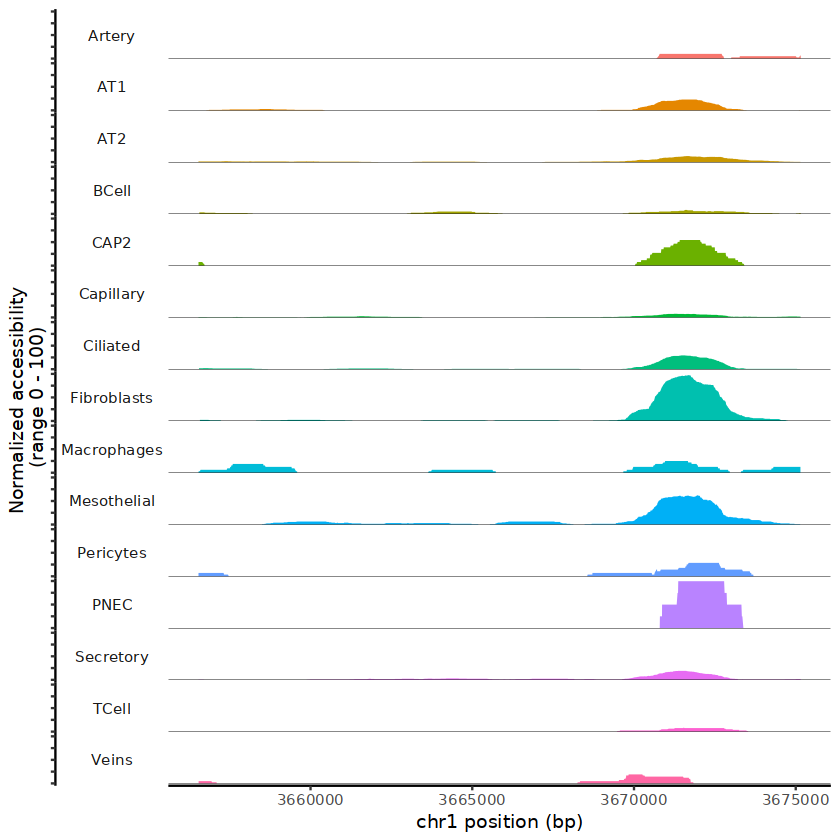

In [95]:
DefaultAssay(sobj_atac_cln) <- 'ATAC'
CoveragePlot(sobj_atac_cln, region = "chr1-3670536-3671156", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

In [97]:
CoveragePlot(sobj_atac_cln, region = "Tead1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

ERROR: Error in FindRegion(object = object, region = region, sep = sep, assay = assay, : Gene not found


In [99]:
suppressMessages(library(EnsDb.Mmusculus.v79))


In [98]:
# extract gene annotations from EnsDb
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79, verbose = F)

# change to UCSC style since the data was mapped to hg19
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
genome(annotations) <- "mm10"

# add the gene information to the object
Annotation(sobj_atac_cln) <- annotations

Warning message:
"no function found corresponding to methods exports from 'BSgenome' for: 'releaseName'"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combi

Warning message:
"Removed 2 rows containing missing values (geom_segment)."


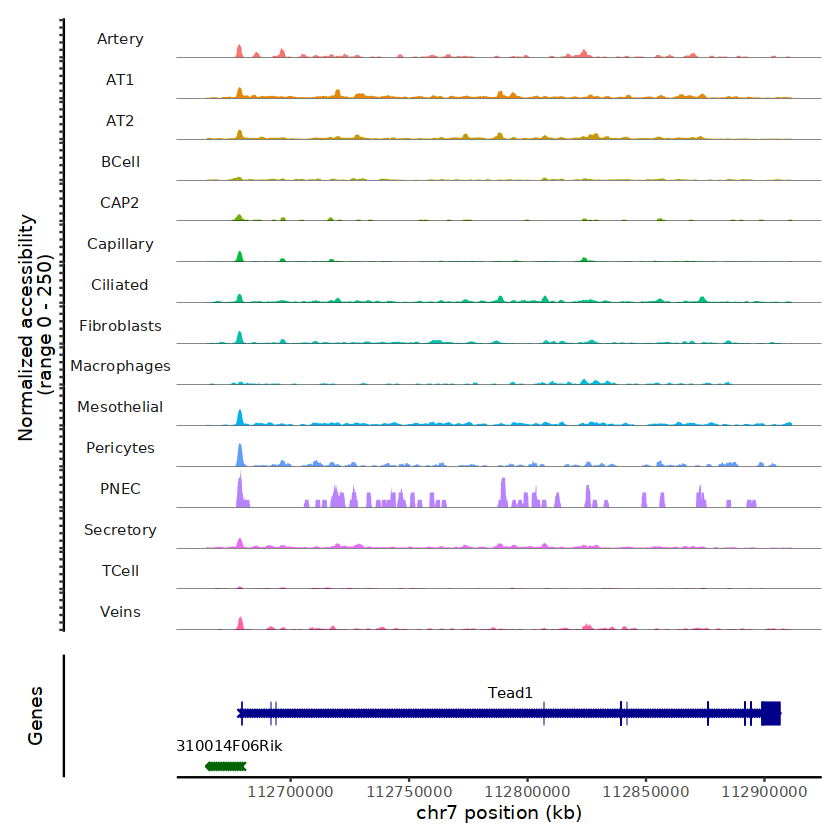

In [100]:
CoveragePlot(sobj_atac_cln, region = "Tead1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

Warning message:
"Removed 53 rows containing missing values (position_stack)."
Warning message:
"Removed 12 rows containing missing values (geom_segment)."


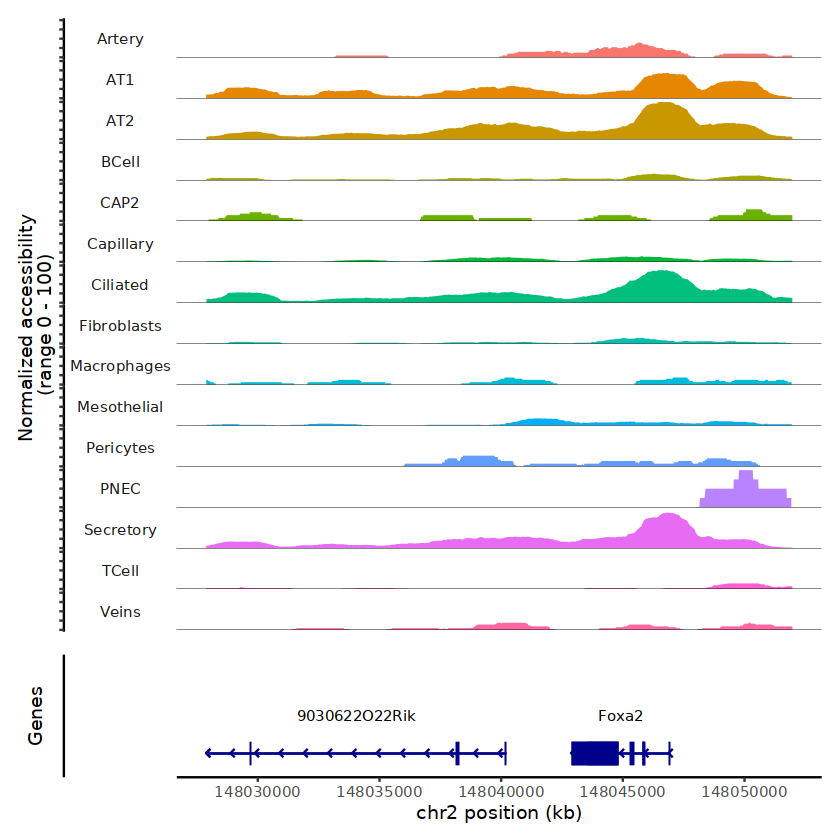

In [104]:
CoveragePlot(sobj_atac_cln, region = "Foxa2", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

Warning message:
"Removed 7 rows containing missing values (position_stack)."


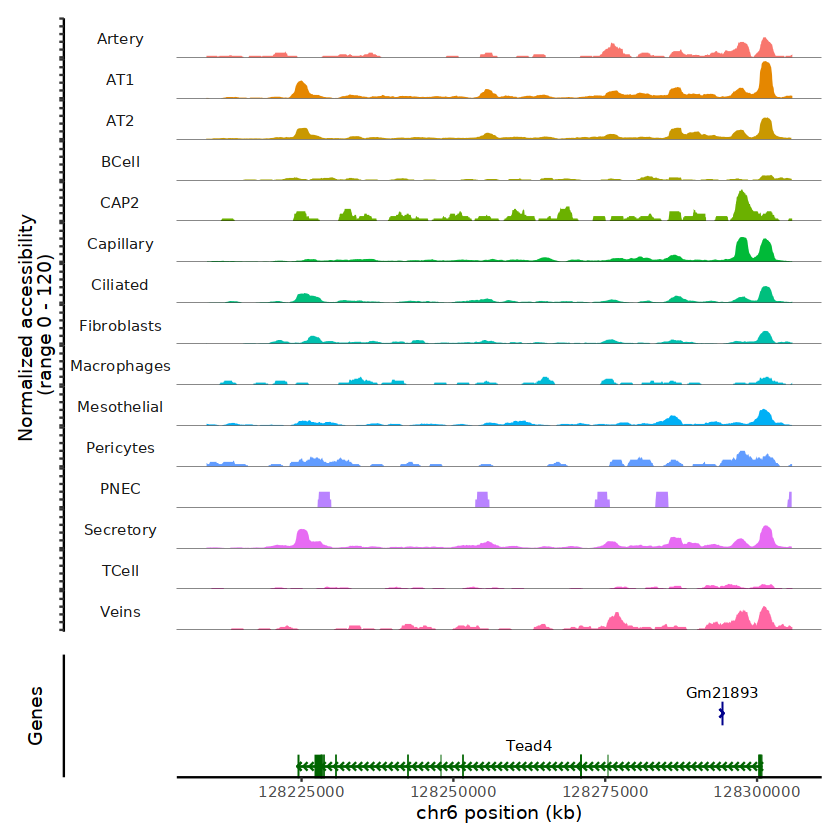

In [101]:
CoveragePlot(sobj_atac_cln, region = "Tead4", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

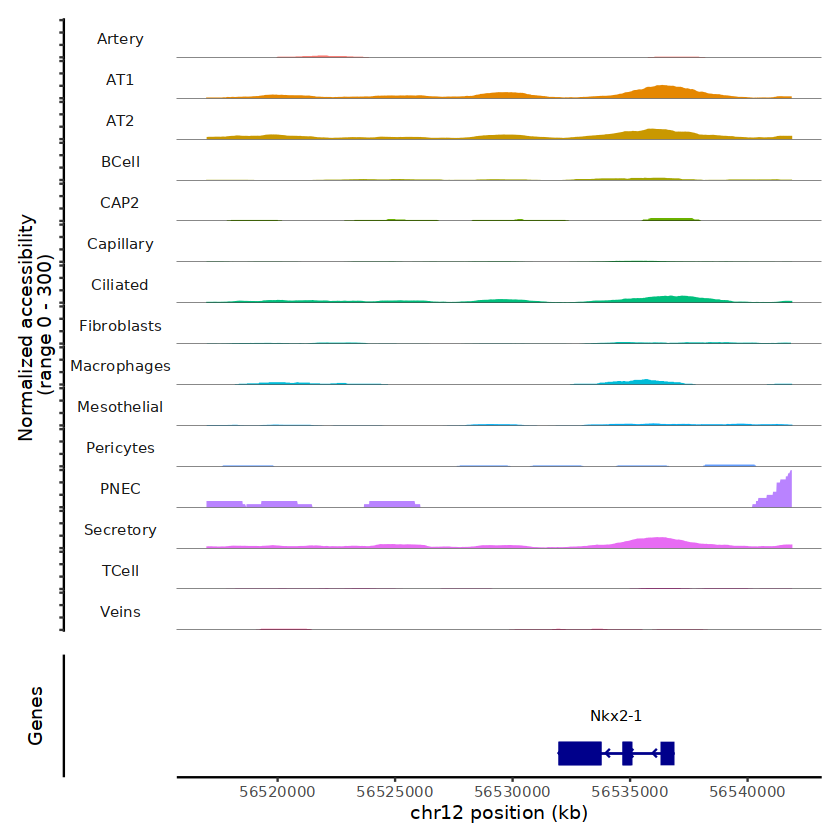

In [102]:
CoveragePlot(sobj_atac_cln, region = "Nkx2-1", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

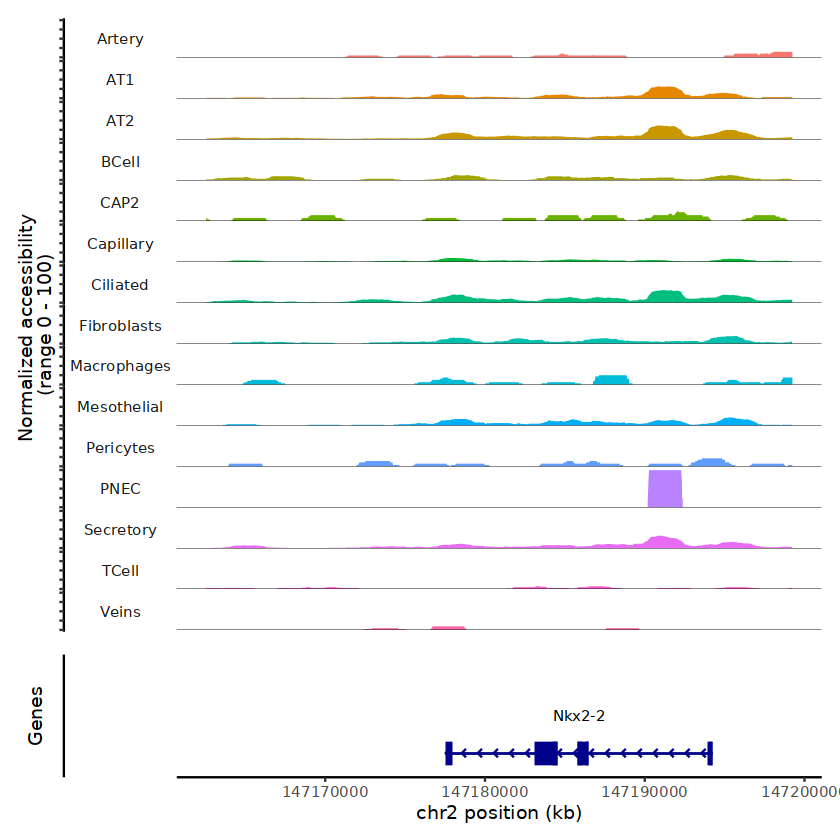

In [103]:
CoveragePlot(sobj_atac_cln, region = "Nkx2-2", annotation = T, window = 2000, peaks = F, 
             extend.upstream = 15000, extend.downstream = 5000, group.by = "celltype_v04") 

In [ ]:
sobj_hist$cell_barcode <- colnames(sobj_hist)
sobj_hist_cln <- subset(sobj_hist, cell_barcode %in% cln_barcodes )
sobj_hist_cln